In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

data=np.load('data.npy')
target=np.load('target.npy')



In [2]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
hist=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)



Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5434

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 22s 709ms/step - loss: 0.6916 - accuracy: 0.5434 - val_loss: 0.6303 - val_accuracy: 0.6532
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.7192

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 22s 697ms/step - loss: 0.5579 - accuracy: 0.7192 - val_loss: 0.5114 - val_accuracy: 0.7540
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.8444

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 21s 694ms/step - loss: 0.3548 - accuracy: 0.8444 - val_loss: 0.4046 - val_accuracy: 0.7984
Epoch 4/10
31/31 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.8980

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 22s 697ms/step - loss: 0.2498 - accuracy: 0.8980 - val_loss: 0.3786 - val_accuracy: 0.8427
Epoch 5/10
31/31 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9404

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 22s 698ms/step - loss: 0.1615 - accuracy: 0.9404 - val_loss: 0.2780 - val_accuracy: 0.8911
Epoch 6/10
31/31 [==============================] - 22s 698ms/step - loss: 0.1537 - accuracy: 0.9394 - val_loss: 0.3033 - val_accuracy: 0.8871
Epoch 7/10
31/31 [==============================] - 23s 733ms/step - loss: 0.1051 - accuracy: 0.9636 - val_loss: 0.3350 - val_accuracy: 0.8710
Epoch 8/10
31/31 [==============================] - 23s 730ms/step - loss: 0.0832 - accuracy: 0.9717 - val_loss: 0.3005 - val_accuracy: 0.8911
Epoch 9/10
31/31 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9798

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


31/31 [==============================] - 23s 739ms/step - loss: 0.0573 - accuracy: 0.9798 - val_loss: 0.2660 - val_accuracy: 0.9274
Epoch 10/10
31/31 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9848

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


31/31 [==============================] - 22s 717ms/step - loss: 0.0419 - accuracy: 0.9848 - val_loss: 0.2639 - val_accuracy: 0.9032


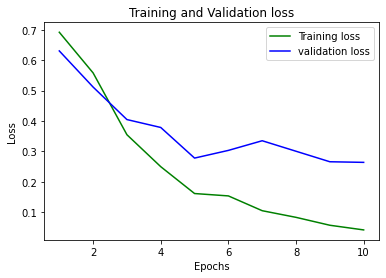

In [12]:
import matplotlib.pyplot as plt
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

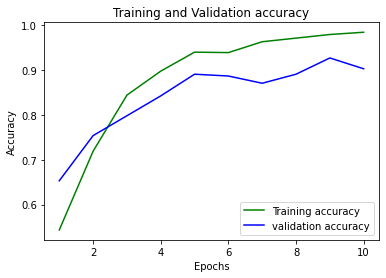

In [19]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
import pandas as pd

In [22]:
df=pd.DataFrame(hist.history['accuracy'])

In [23]:
df

,0
0,0.543434
1,0.719192
2,0.844444
3,0.897980
4,0.940404
5,0.939394
6,0.963636
7,0.971717
8,0.979798
9,0.984848


In [27]:
print(df.max())

0    0.984848
dtype: float64


In [28]:
print(df.mean())

0    0.878485
dtype: float64
